## Problema de Negócio

<center><img src = https://www.questback.com/wp-content/uploads/2022/07/Customer-churn-rate-1024x683.jpg /> </center>

Prever a rotatividade de clientes (Customer Churn) é uma das tarefas mais importantes em qualquer empresa que depende de clientes para sua receita. A perda de clientes pode ter um impacto significativo nas receitas, lucros e na reputação da empresa. Além disso, a aquisição de novos clientes pode ser muito mais cara do que manter os existentes, tornando a prevenção da rotatividade de clientes uma estratégia crucial para o sucesso de uma empresa.

As técnicas de machine learning podem ajudar as empresas a prever com precisão a probabilidade de um cliente abandonar a empresa e identificar os fatores que levam a essa decisão. Com essas informações, as empresas podem tomar medidas proativas para reter seus clientes, como oferecer promoções personalizadas, melhorar o atendimento ao cliente e identificar problemas de produto ou serviço.

Portanto, a previsão de Customer Churn e o uso de técnicas de machine learning para isso podem trazer diversos benefícios para as empresas, como a melhoria da satisfação e fidelidade do cliente, aumento da receita e redução de custos de aquisição de clientes. Dito isso, neste projeto iremos analisar um conjunto de dados e, a partir do mesmo, tentar predizer se o cliente irá ou não abandonar seu plano, bem como sua respectiva probabilidade (de cancelar ou não).

In [1]:
# Suprimindo Warnings
import warnings
warnings.simplefilter(action='ignore')

# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import style

import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Bibliotecas para análise estatística
from scipy.stats import shapiro, mannwhitneyu, skew

# Biblioteca para trabalhar com informações dos Estados Unidos (opcional)
import us


# Biblioteca para manipular strings
import textwrap



# Módulos  de ML
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Importando classes base do sckit learn para criar Transformadores
from sklearn.base import TransformerMixin, BaseEstimator

# Importando a classe para transformaçoes gerais no dataset
from sklearn.compose import ColumnTransformer



# Bibliotecas para pré-processamento de variáveis
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.feature_selection import RFE

# Importando modelos
from sklearn.linear_model import LogisticRegression

# Importando métricas
from sklearn.metrics import confusion_matrix, make_scorer, recall_score





In [2]:
# Alterando a paleta de cores
style.use('fivethirtyeight')

## Análise Exploratória

Vamos ler o nosso conjunto de dados de treino e teste:

In [3]:
df = pd.read_csv('projeto4_telecom_treino.csv', index_col = 0)

In [4]:
df_teste = pd.read_csv('projeto4_telecom_teste.csv', index_col = 0)

Visualizando as primeiras 5 observações:

In [5]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [6]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


Verificando o formato do conjunto de dados:

In [7]:
df.shape

(3333, 20)

Como é possível perceber, o nome das colunas são descritivas. Vamos observar atentamente qual o nome de cada uma das colunas do *dataset*:

In [8]:
df.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

Verificando valores ausentes por coluna:

In [9]:
df.isna().sum().sort_values(ascending=True)

state                            0
total_intl_charge                0
total_intl_calls                 0
total_intl_minutes               0
total_night_charge               0
total_night_calls                0
total_night_minutes              0
total_eve_charge                 0
total_eve_calls                  0
total_eve_minutes                0
total_day_charge                 0
total_day_calls                  0
total_day_minutes                0
number_vmail_messages            0
voice_mail_plan                  0
international_plan               0
area_code                        0
account_length                   0
number_customer_service_calls    0
churn                            0
dtype: int64

Percebendo o tipo de cada coluna:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   float6

**Descobertas:**

* Dentre as 16 variáveis, temos 5 variáveis categóricas:
    * state
    * area_code
    * international_plan
    * voice_main_plan
    * churn

Visualmente, teremos a distribuição por:

In [11]:
# Filtrar colunas numéricas e categóricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_cols = [column for column in df.columns if column not in numeric_cols]

# Contar o número de colunas numéricas e categóricas
num_numeric_cols = len(numeric_cols)
num_cat_cols = len(cat_cols)

# Rótulos e valores para o gráfico de pizza
labels = ['Variáveis Numéricas', 'Variáveis Categóricas']
values = [num_numeric_cols, num_cat_cols]

# Cores para os setores do gráfico de pizza
colors = ['##30a2da', '#58D68D']

# Configuração do gráfico
fig = go.Figure(
    data=[go.Pie(
        labels=labels,
        values=values,
        pull=[0.1, 0],  # Destacar o primeiro setor (Variáveis Numéricas)
        marker=dict(colors=colors,
                    line=dict(color='#000000', width=2))
    )]
)

# Configuração do layout
fig.update_layout(
    title='Presença de Variáveis Categóricas x Numéricas',
    title_xanchor='center',
    title_font_family='Overpass',
    title_font_size=22,
    title_x=0.5
)

# Exibir o gráfico
fig.show()



Vamos fazer uma análise superficial das variáveis categóricas:

In [12]:
# Selecionando apenas as variáveis categóricas
df_cat = df.select_dtypes(include = 'object')

# Transpondo a matriz para melhorar a visualização
df_cat.describe().T

,count,unique,top,freq
state,3333,51,WV,106
area_code,3333,3,area_code_415,1655
international_plan,3333,2,no,3010
voice_mail_plan,3333,2,no,2411
churn,3333,2,no,2850


Aprofundando um pouco mais sobre as variáveis categóricas:

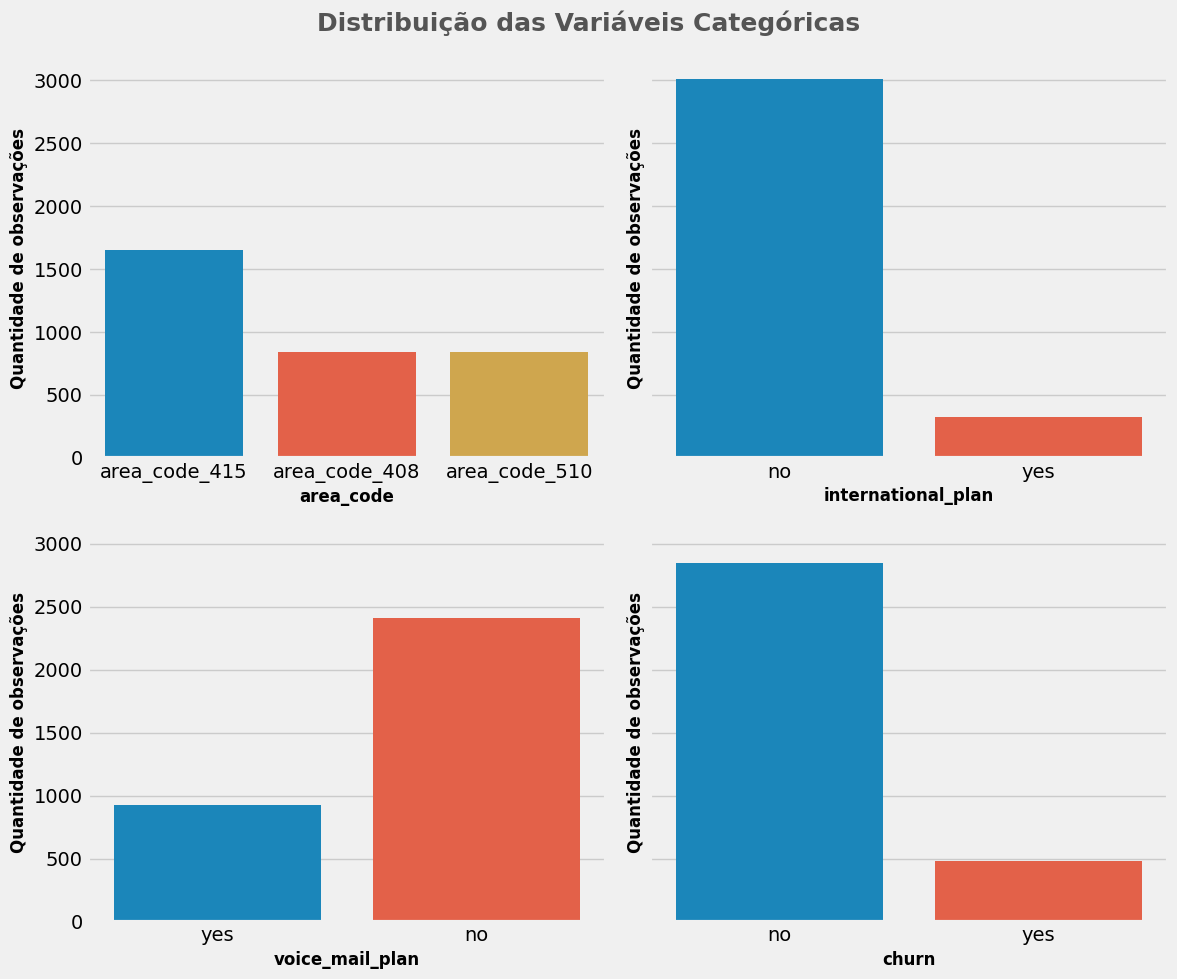

In [13]:

# Definindo a matriz de subplots
fig, axs = plt.subplots(2, 2,  sharey= True, figsize=(12, 10))


# Loop para criar gráfico das variáveis categóricas
for i, ax in enumerate(axs.flat):

    # Cria o gráfico de contagem para a variável categórica
    sns.countplot(x = df_cat[cat_cols[i+1]], ax = ax)

    # Define o título dos eixos
    ax.set_ylabel('Quantidade de observações', size = 12, weight = 'bold')
    ax.set_xlabel(cat_cols[i+1], size = 12,  weight = 'bold')

    # Ajusta o layout do subplot
    plt.tight_layout()

# Título geral para os gráficos
plt.suptitle('Distribuição das Variáveis Categóricas',
             size = 18,
             weight = 'bold',
             alpha = .65)

# Ajusta a posição do título geral
plt.subplots_adjust(top = 0.93)

# Exibe os gráficos
plt.show()
    

Como da análise descritiva foi possível perceber que para a variável categórica de estados, existem **51** estados diferentes, vamos tentar visualizar quais são as regiões que possuem mais clientes. Este passo é importante para verificar e validar em um possível *deploy* de um módelo de machine learning, uma vez que ele pode tornar-se tendencioso em determinados casos.

In [14]:
# Utilizando a biblioteca us para pegar as abreviações dos estados e os seus nomes completos
dicio_states_sigl = us.states.mapping('abbr', 'name')

In [15]:
df_states = pd.DataFrame(df_cat['state'].value_counts())\
            .reset_index()\
            .rename(columns = dict(count = 'Num_Clientes',
                        state = 'Estado_abv'))
df_states['Estado_Compl'] =  df_states['Estado_abv'].replace(dicio_states_sigl)


# Dicionário que contém estados e regiões
states_to_regions = {
    'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Nevada': 'West',
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Utah': 'West',
    'Colorado': 'West', 'Alaska': 'West', 'Hawaii': 'West', 'Maine': 'Northeast',
    'Vermont': 'Northeast', 'New York': 'Northeast', 'New Hampshire': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Wisconsin': 'Midwest',
    'Illinois': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'West Virginia': 'South', 'District of Columbia': 'South', 'Maryland': 'South',
    'Virginia': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'North Carolina': 'South',
    'Mississippi': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Alabama': 'South',
    'Georgia': 'South', 'South Carolina': 'South', 'Florida': 'South', 'Delaware': 'South',
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
    'Texas': 'Southwest'}

df_states['Regiao'] = df_states['Estado_Compl'].replace(states_to_regions)

# Organizando a ordem das colunas                        
df_states = df_states.reindex(columns = ['Estado_abv', 'Estado_Compl', 'Regiao', 'Num_Clientes'])


Vamos verificar como ficou nossa nova manipulação e se geramos algum tipo de dado ausente durante o processo:

In [16]:
df_states.head()

,Estado_abv,Estado_Compl,Regiao,Num_Clientes
0,WV,West Virginia,South,106
1,MN,Minnesota,Midwest,84
2,NY,New York,Northeast,83
3,AL,Alabama,South,80
4,WI,Wisconsin,Midwest,78


In [17]:
df_states.isna().sum()

Estado_abv      0
Estado_Compl    0
Regiao          0
Num_Clientes    0
dtype: int64

In [18]:
df_states.head()

,Estado_abv,Estado_Compl,Regiao,Num_Clientes
0,WV,West Virginia,South,106
1,MN,Minnesota,Midwest,84
2,NY,New York,Northeast,83
3,AL,Alabama,South,80
4,WI,Wisconsin,Midwest,78


In [19]:
fig = px.sunburst(
    df_states,
    path = ['Regiao', 'Estado_Compl'],
    values = 'Num_Clientes',
    labels = ['Regioes', 'Estados'],
    branchvalues = 'total'  
)
fig.update_layout(
    title = 'Clientes por Região',
    title_font = dict(color = 'rgba(0, 0, 0, .75)',
                      size = 23),
    title_x = 0.5,
    width = 800,
    height = 600
)



Portanto, temos:
*   Dos *states*, temos **51** *states* diferentes, sendo que o estado com a maior ocorrencia é 'WV' (106 ocorrencias)
* Temos apenas **3** *area_code* diferentes, com um deles tendo uma frequencia **alta** de 1615 ocorrencias, o que indica mais que a metade de clientes totais do conjunto de dados disposto
* Em *international_plan* pode-se constatar que a **maioria** dos planos não são internacionais e que esta é uma variável categórica binária
* Assim como em *internation_plan*, a variável *voice_mail_plan* também é binária sendo que a **maioria** dos clientes (2411) optam por não ter um.
* A variável alvo deste projeto, *churn*, é também uma variável binária e possui um claro **desbalanceamento**, onde na maioria das observações, os clientes não abandonaram a empresa. Isso é um ponto de atenção pois, para eventuais modelos de *machine learning* que possam ser empregados e também suas respectivas métricas, medidas devem ser tomadas para que não haja *overfit* ou *underfit*
* A quantidade de clientes das regiões *Southwest* e *DC* são as com menores observações, o que pode ser também um ponto de atenção a ser levado em consideração quanto a confiabilidade de possíveis futuros modelos de *machine learning* que precisem predizer clientes dessas duas regiões. 

Agora, vamos verificar quais sao os 10 estados com os maiores números de ligaçoes de clientes (em quantidade)?

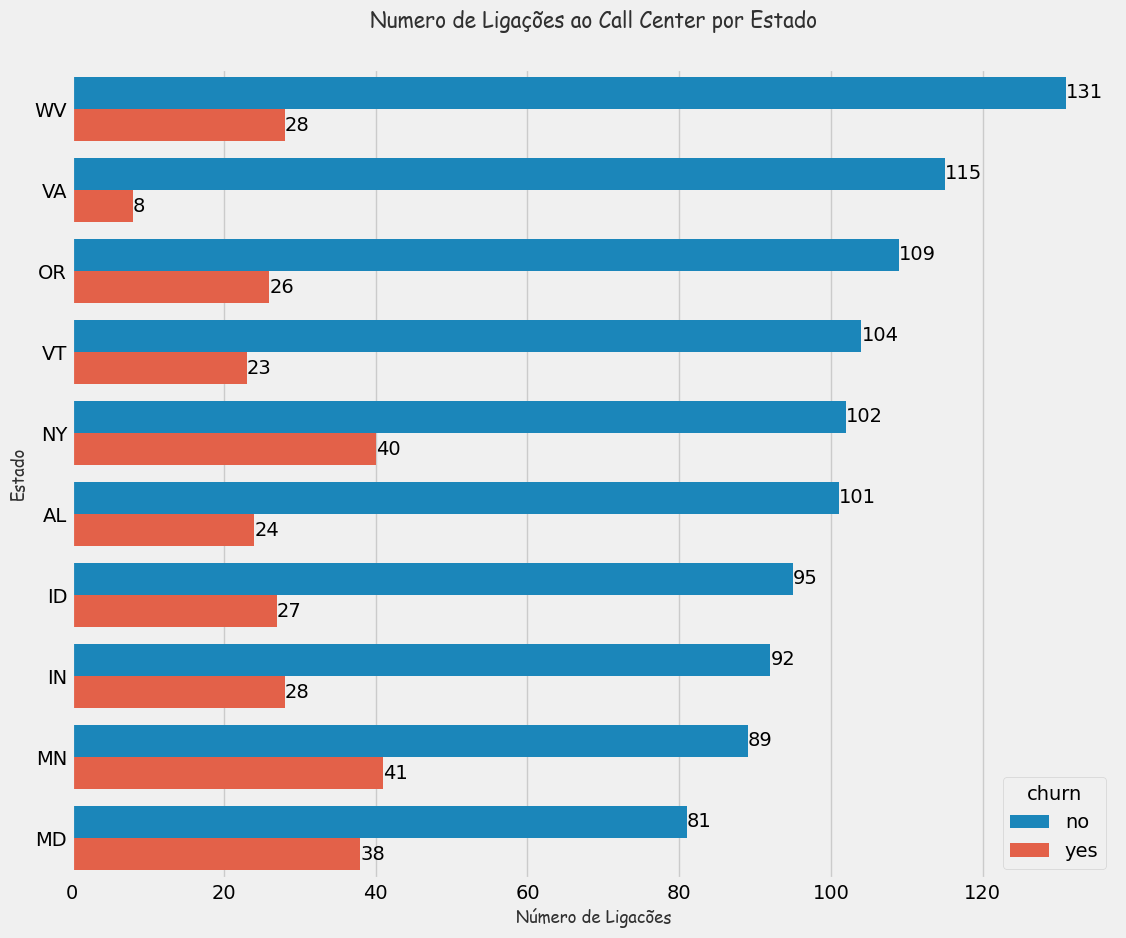

In [20]:
plt.figure(figsize= (12,10))

# Primeiro, somamos o número total de 'number_customer_service_calls' por estado

df_state_calls_sum = df.groupby('state')['number_customer_service_calls'].sum().reset_index()

# Em seguida, selecionamos os top 10 estados com maior soma de 'number_customer_service_calls'

top_10_states = df_state_calls_sum.nlargest(10, 'number_customer_service_calls')


# Agora, calculamos a quantidade de 'churn' para cada um desses top 10 estados

top_10_states_churn = df[df['state'].isin(top_10_states['state'])].\
                groupby(['state', "churn"])['number_customer_service_calls'].\
                sum().\
                reset_index().\
                sort_values(ascending = False, by = 'number_customer_service_calls')

# Plotando a figura
ax = sns.barplot(top_10_states_churn, 
            y = 'state', 
            x = 'number_customer_service_calls',
            hue = "churn",
            orient= 'h')

# Configurando as legendas e títulos
plt.title('Numero de Ligações ao Call Center por Estado',
          pad  = 30,
          fontdict= {"family":'cursive',
                       "size": '15',
                       'alpha': .8})
plt.ylabel('Estado',
           fontdict=  {"family":'cursive',
                       "size": '12',
                       'alpha': .8})

plt.xlabel('Número de Ligacões',
           fontdict=  {"family":'cursive',
                       "size": '12',
                       'alpha': .8})

# Adicionando valores a cada uma das barras
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()

* Dada a análise inicial onde descobrimos que o estado que mais possuia observações no conjunto de dados era o da "West Virginia", não é de se espantar que também seja o estado que mais possua ligações ao call center. 

* Nos estados **NU**, **MN**, **MD**, o número de ligações de clientes que encerraram o relacionamento com a empresa corresponde a cerca da metade do número de ligações totais efetuadas pelos clientes que permaneceram. Tal cenário pode sugerir a possibilidade de que o serviço de atendimento ao cliente nestas regiões esteja enfrentando um déficit ou demandando melhorias.

* Por outro lado, o estado **VA** demonstra um índice reduzido de desligamentos de clientes. Essa constatação sugere que, apesar do volume de chamadas recebidas pelo call center, o atendimento provavelmente é eficiente, garantindo a satisfação dos clientes e, consequentemente, assegurando sua fidelização à empresa.

Vamos analisar o histograma das nossas variáveis numéricas:

In [21]:
# Criando um dataframe somente com as colunas do tipo int e float
df_num = df.select_dtypes(include = ['int64', 'float64'])

# selecionando o nome das colunas
nums = df_num.columns

Vamos visualizar rapidamente as estatísticas descritivas das nossas variáveis numéricas, ordenadas pelas de maior desvio padrão.

In [22]:
df_num.describe().T.sort_values(by = 'std', ascending= False)\
    .style.background_gradient(cmap = 'GnBu')\
    .bar('std', cmap = mcolors.LinearSegmentedColormap.from_list('custom', ['g','#BB0000' ]))

,count,mean,std,min,25%,50%,75%,max
total_day_minutes,3333.000000,179.775098,54.467389,0.000000,143.700000,179.400000,216.400000,350.800000
total_eve_minutes,3333.000000,200.980348,50.713844,0.000000,166.600000,201.400000,235.300000,363.700000
total_night_minutes,3333.000000,200.872037,50.573847,23.200000,167.000000,201.200000,235.300000,395.000000
account_length,3333.000000,101.064806,39.822106,1.000000,74.000000,101.000000,127.000000,243.000000
total_day_calls,3333.000000,100.435644,20.069084,0.000000,87.000000,101.000000,114.000000,165.000000
total_eve_calls,3333.000000,100.114311,19.922625,0.000000,87.000000,100.000000,114.000000,170.000000
total_night_calls,3333.000000,100.107711,19.568609,33.000000,87.000000,100.000000,113.000000,175.000000
number_vmail_messages,3333.000000,8.099010,13.688365,0.000000,0.000000,0.000000,20.000000,51.000000
total_day_charge,3333.000000,30.562307,9.259435,0.000000,24.430000,30.500000,36.790000,59.640000
total_eve_charge,3333.000000,17.083540,4.310668,0.000000,14.160000,17.120000,20.000000,30.910000


Antes de fazer qualquer visualização sobre essas visualizações, vamos calcular os coeficientes de assimetria de cada uma das variáveis:

In [23]:
skew_vector = []
for i in range(len(nums)):
    skew_vector.append(skew(df[nums[i]]))

# vamos juntar os dois objetos para que possamos referencia-los nos gráficos futuramente:
nums = list(zip(nums, skew_vector))

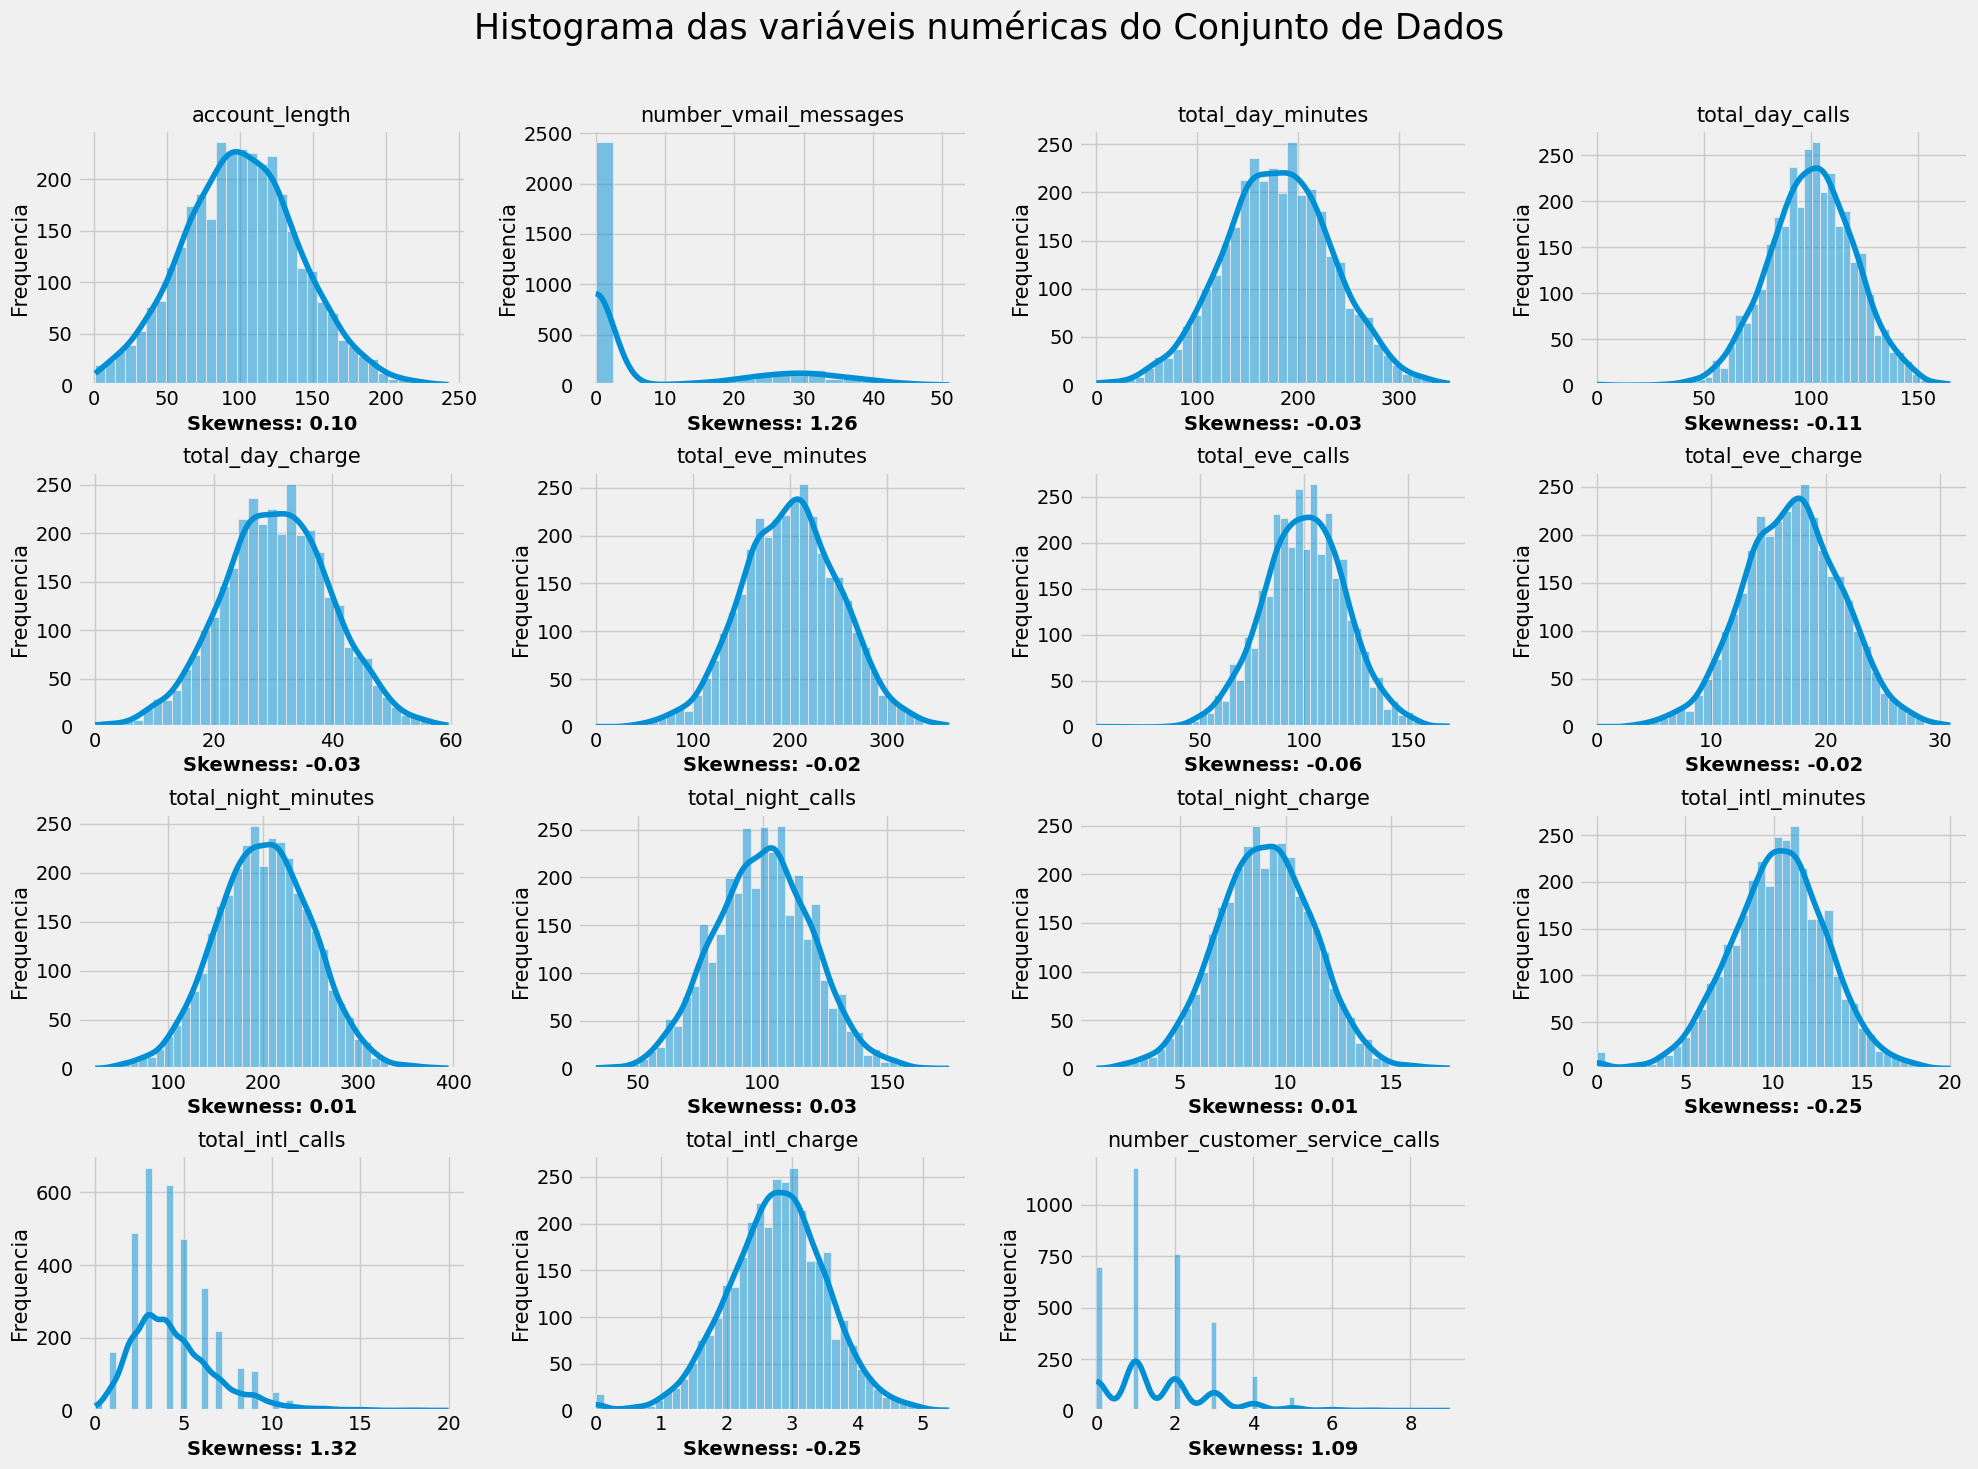

In [24]:
# Definindo o tamanho da figura
plt.figure(figsize  = (20, 15))


for i in range(len(nums)):

    # Definindo a posição da figura no subplot
    ax = plt.subplot(4, 4, i+1)

    # Plotando o histograma
    sns.histplot(x = df_num[nums[i][0]], kde = True)

    # Ajustando o texto que será exibido no label do eixo x
    skewness_label = textwrap.TextWrapper(width = 20).fill(f'Skewness: {nums[i][1]:.2f}')

    # Definindo o que será disposto no eixo X do subplot
    ax.set_xlabel(skewness_label, fontsize=14,
                   fontweight = 'bold')
    
    # Definindo o que será disposto no eixo Y do subplot
    ax.set_ylabel('Frequencia', fontsize = 15)

    # Definindo o título do subplot
    ax.set_title(nums[i][0], fontsize = 15)

    plt.tight_layout()

# Definindo o título geral da figura
plt.suptitle('Histograma das variáveis numéricas do Conjunto de Dados',
              fontsize = 25)

# Ajustando o posicionamento entre a figura e os subplots
plt.subplots_adjust(top = 0.90)

# Mostrando os plots
plt.show()


É interessante perceber que quase todas as variáveis numéricas parecem ter uma distribuição que se **assemelha** a normal. No entanto, por outro lado, temos a variável *number_vmal_messages* que não possui uma distribuição próxima a normal. Vamos analisa-la:

In [25]:
df['number_vmail_messages'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: number_vmail_messages, dtype: float64

A variável *number_vmal_messages* possui uma distribuição onde o 1º e 2º quartil são iguais a 0 e que os demais dados possuem valores diferentes de 0. Ou seja, pelo menos metade dos usuários  recebem mensagens de voz na sua caixa postal.

No mesmo sentido, temos a variável *total_init_calls* que lembra uma distribuição  inclinada à direita. Vamos verificar isso:

In [26]:
df['total_intl_calls'].describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: total_intl_calls, dtype: float64

* Uma das características desse tipo de distribuição com assimetria à direita é que a média é maior que a mediana. Este tipo de assimetria também é chamado de **assimetria positiva**.
* O coeficiente de assimetria calculado anteriormente, podemos ver que *number_val_messages*, *total_init_calls* e *number_customer_service_calls* são de fato distribuições assimétricas.

Vamos agora verificar as correlações entre as variáveis:

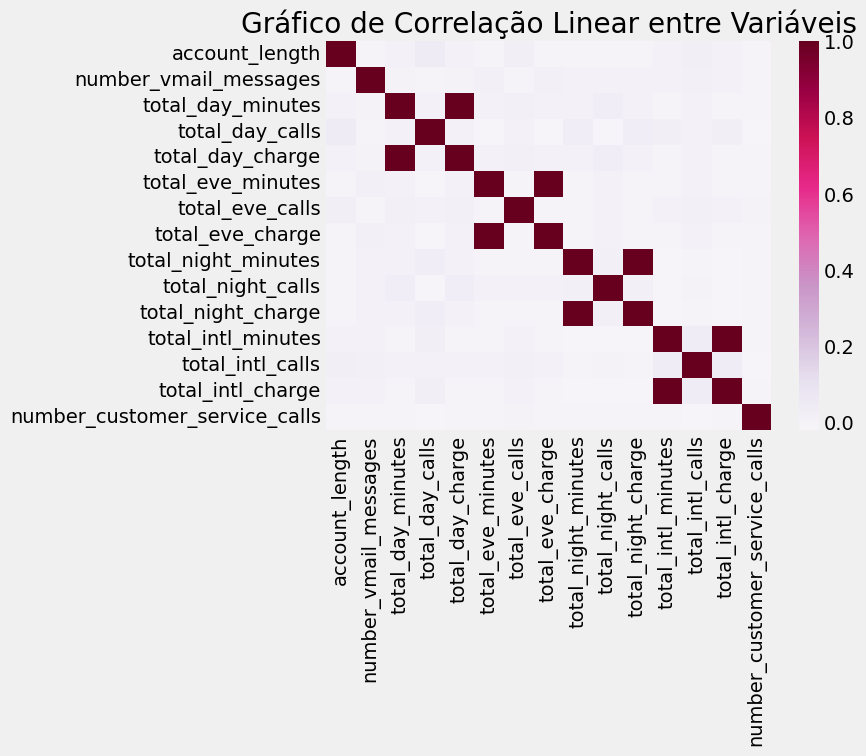

In [27]:
plt.plot(figure = (10,5))
plt.title('Gráfico de Correlação Linear entre Variáveis')
sns.heatmap(df_num.corr(), cmap = 'PuRd')
plt.show()

Percebemos através do mapa de calor que, em sua maioria, as variáveis em geral possuem baixa correlação entre si. No entanto, vale salientar que a correlação em análise por esse método *corr()* do Pandas é uma correlação **linear** e que a correlação não indica a causalidade.

Por outro lado, algumas variáveis apresentam alta correlação entre si, o que nos leva a investigar um pouco mais a fundo o assunto.

In [28]:
# Pegando a matriz de correlação
corr_matrix = df_num.corr()

# Pegando os índices da matriz do triangulo superior da matriz
indices = np.triu_indices(len(corr_matrix), 1)

high_correlation = []

print('Correlação entre as variáveis: \n')
for i, j in zip(indices[0], indices[1]):
    correlacao = corr_matrix.iloc[i,j]
    
    if correlacao > 0.5:
        col_name_first = corr_matrix.columns[i]
        col_name_second = corr_matrix.columns[j]
        
        print(f'{col_name_first} x {col_name_second} = {correlacao:.2f}')
        high_correlation.append(f'{col_name_first} x {col_name_second} = {correlacao:.2f}')


Correlação entre as variáveis: 

total_day_minutes x total_day_charge = 1.00
total_eve_minutes x total_eve_charge = 1.00
total_night_minutes x total_night_charge = 1.00
total_intl_minutes x total_intl_charge = 1.00


**Análise:**
* Todas as variáveis analisadas possuem forte correlação entre si. Além disso, pode-se afirmar que possuem uma correlacão positiva perfeita. Dessa forma, torna-se interessante dizer que nas etapas de *feature engineering* talvez seja interessante retirarmos alguma dessas variáveis ou realizar algum tipo de transformação.

Vamos analisar agora a variável alvo do nosso problema, chamada *churn*.

In [29]:
fig = px.histogram(
    df, x = 'churn'
)
fig.update_traces(marker_color = ['#30a2da','#DE3163'],
                  marker_line_color = 'rgb(0,0,0)',
                  marker_line_width = 2)

fig.update_layout(title = 'Distribuição dos Clientes ',
                  title_x = 0.5,
                  title_font = dict(size = 20),
                  width = 800,
                  height = 600)
fig.update_xaxes(title_text = 'Abandono',
                 title_font = dict(size = 14))
fig.update_yaxes(title_text = 'Número de Obs.',
                title_font = dict(size = 14))

In [30]:
# Criando uma cópia do DataFrame para continuar com as análises e não alterar o conjunto
# de dados original
df_exp = df.copy()
df_exp['total_calls'] = df_exp['total_day_calls'] + df_exp['total_night_calls'] + df_exp['total_intl_calls']
df_exp['total_charge'] = df_exp['total_day_charge'] + df_exp['total_night_charge'] + df_exp['total_intl_charge']
df_exp['mean_minutes_by_call'] = (df_exp['total_day_minutes'] + df_exp['total_night_minutes'] + df_exp['total_eve_minutes']) / df_exp['total_calls'] 

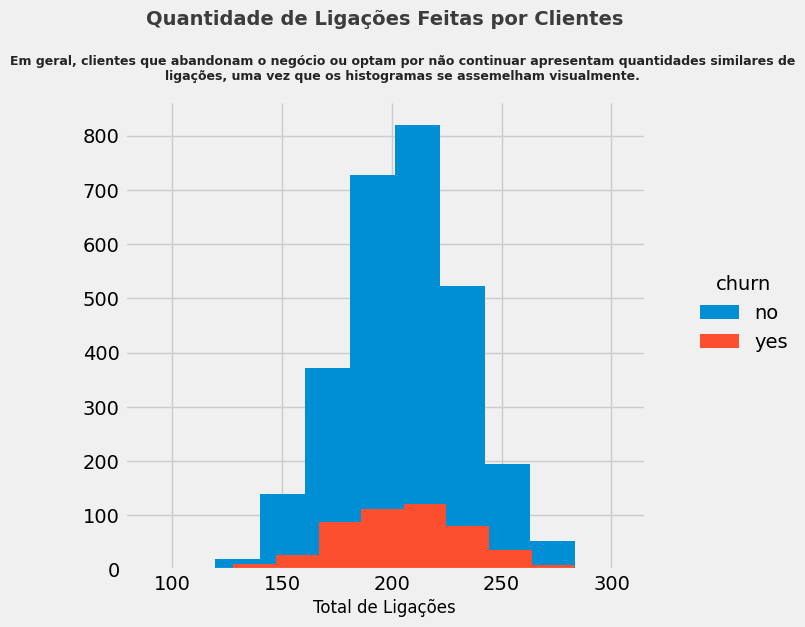

In [31]:
sns.FacetGrid(df_exp, hue = 'churn', height = 6) \
    .map(plt.hist, 'total_calls') \
    .add_legend()
plt.title('Quantidade de Ligações Feitas por Clientes',
          size = 14,
          weight = 'bold',
          alpha = 0.75, y = 1.15)
# Texto do suptitle
suptitle_text = (
    'Em geral, clientes que abandonam o negócio ou optam por não continuar apresentam '
    'quantidades similares de ligações, uma vez que os histogramas se assemelham visualmente.'
)
suptitle_text_wrapped = '\n'.join(textwrap.wrap(suptitle_text, width=110))
plt.suptitle(
            suptitle_text_wrapped,
             size = 9,
             x = 0.5,
             weight = 'bold',
             alpha = 0.85)
plt.subplots_adjust(top = 0.9)
plt.xlabel('Total de Ligações', 
           fontdict = dict(size = 12))

plt.show()

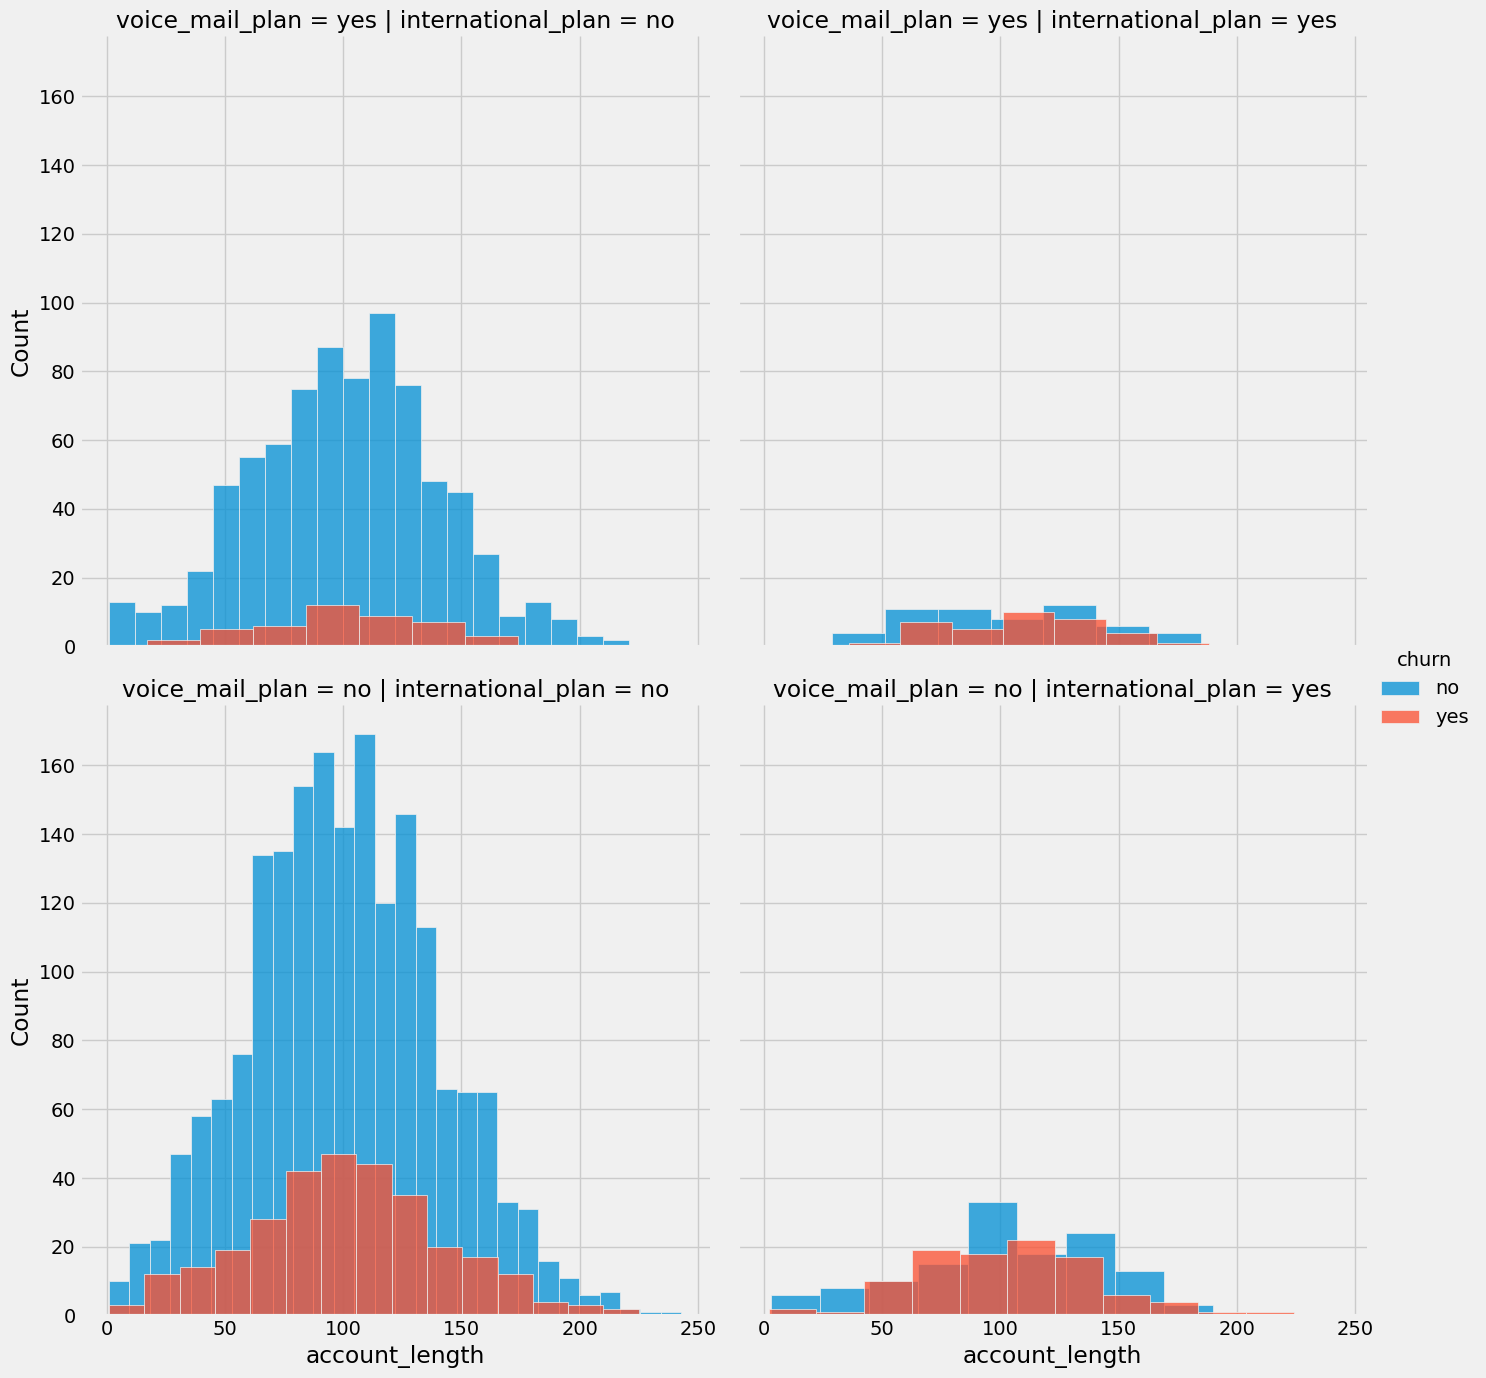

In [32]:

sns.FacetGrid(df_exp, col = 'international_plan',
               row = 'voice_mail_plan',
               hue = 'churn',
               height = 7)  \
    .map(sns.histplot, 'account_length') \
    .add_legend()

plt.show()


**Análise:**

1. Quando clientes possuem somente o plano internacional, nota-se que há quase que uma sobreposição, em alguns momentos, sobre os histogramas. Isso significa que **para essa amostra**, quase não há diferença no tempo de conta de  um usuário que permanece no negócio e de outro que o abandona.  
    * **Hipótese**: A média entre os dois grupos possui uma diferença estatisticamente significante? 
    
<br>

2. Por fim, por se tratarem de uma classe desbalanceada, a taxa de abandono ou permanencia quando o cliente não possui nenhum tipo de plano não é um parametro de comparação, no entanto, pode-se perceber que distribuições quando separadas das duas categorias são muito semelhantes. 

Vamos responder a hipótese do item 1 realizando o teste t de Student. Antes disso, devemos atender as premissas do teste:
<br>
 1. Os dados são aleatórios e representativos da população.
 2. A variável dependente é contínua.
 3. Ambos os grupos são independentes (ou seja, grupos exaustivos e excludentes).
 4. Os resíduos do modelo são normalmente distribuídos.
 5. A variância residual é homogênea (princípio da homocedasticidade).

 Partindo do pressuposto que os dados são aleatórios e representativos e que a variável dependente é contínua, vamos segmentar o conjunto de dados para os dois grupos em análise:

In [33]:
groups = df_exp.loc[df_exp['international_plan'] == 'no'].copy()
group_1 = groups.loc[groups['churn'] == 'yes']['account_length']
group_2 = groups.loc[groups['churn'] == 'no']['account_length']

Vamos analisar a média destes dois grupos:

In [34]:
print(f'A média do grupo de clientes({len(group_1)}) que abandonou o negócio é de {group_1.mean():.2f} meses')

A média do grupo de clientes(346) que abandonou o negócio é de 101.78 meses


In [35]:
print(f'A média do grupo de clientes({len(group_2)}) que não abandonou o negócio é de {group_2.mean():.2f} meses')

A média do grupo de clientes(2664) que não abandonou o negócio é de 100.61 meses


Novamente, será que, apesar do tamanho entre as duas amostras ser tão diferente, pode-se dizer que existe uma diferença estatística significante entre esses dois grupos?

Seguindo com o teste, vamos verificar se ambas as amostras possuem distribuição normal por meio do teste de Shapiro-Wilk:

In [36]:
shapiro(group_1)

ShapiroResult(statistic=0.9954464435577393, pvalue=0.40983712673187256)

Neste caso, como nossa estatística **W = 0.9954** e o **p-value = 0.4098**, não há evidencia estatística suficiente para rejeitar a hipótese nula de que esse conjunto de dados possui uma distribuição normal.

In [37]:
shapiro(group_2)

ShapiroResult(statistic=0.9980570077896118, pvalue=0.0024444598238915205)

Neste caso, como nossa estatística **W = 0.0.9971** e o **p-value=0.002**, há significancia  estatística suficiente para rejeitar a hipótese nula de que esse conjunto de dados possui uma distribuição normal.

Como um dos critérios para que executemos o teste t seja que os nossos conjuntos de dados tenha uma distribuição normal, não podemos executa-lo. Dessa forma, vamos partir para  testes estatísticos não parametricos.

Como teste alternativo, iremos utilizar o teste de Mann-Whitney. Dessa forma, as nossas hipóteses ficam da seguinte forma:
* H<sub>o</sub>: Os grupos possuem a mesma distribuição
* H<sub>a</sub>: Os grupos possuem distribuições distintas


In [38]:
mannwhitneyu(group_1, group_2)

MannwhitneyuResult(statistic=468012.5, pvalue=0.6387072788948748)

Portanto, de acordo com o teste, a um nível de significancia de 5% e como **pvalue = 0.6387**, não há evidência estatística suficiente para rejeitar a hipótese H<sub>o</sub>.

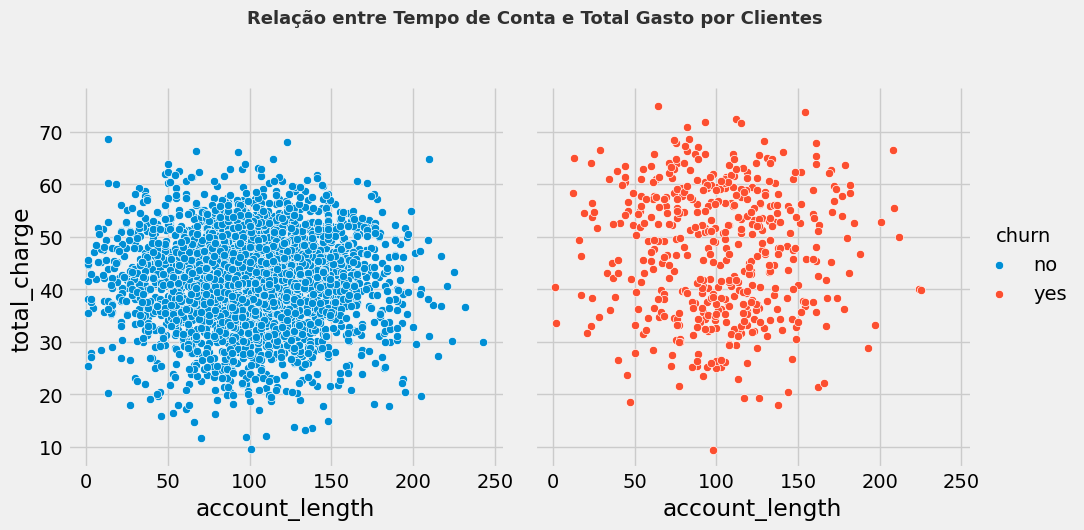

In [39]:

grid = sns.FacetGrid(
    data = df_exp,
    col = 'churn',
    hue = 'churn',
    height = 5
) \
    .map(sns.scatterplot,  'account_length', 'total_charge').add_legend()
grid.set_titles(col_template= '')

plt.title(
    'Relação entre Tempo de Conta e Total Gasto por Clientes',
    size = 13,
    weight = 'bold',
    alpha = .8,
    y = 1.15,
    x = 0
)
plt.show()

Visualmente, não existe uma clara relação entre o total gasto  e o tempo de conta dos clientes que abandomaram ou permaneceram no négocio. No entanto, é interessante observar que existe uma posível  concentração dos valores totais gastos pelos clientes que permaneceram na empresa. Enquanto que para os clientes que abandonaram, os valores gastos estão mais dispersos e portanto, mais variados. 

## Feature Engineering

<body>Inicialmente, podemos falar sobre a etapa de <b>feature engineering</b> deste problema, podemos retomar a relação colinear perfeita que obtivemos na etapa de análise exploratória.</body>
<body> 

In [40]:
# Relembrando sobre as correlações

high_correlation

['total_day_minutes x total_day_charge = 1.00',
 'total_eve_minutes x total_eve_charge = 1.00',
 'total_night_minutes x total_night_charge = 1.00',
 'total_intl_minutes x total_intl_charge = 1.00']


<body>Portanto, analisando a relação entre o tempo gasto em chamadas e o valor total cobrado, encontramos uma relação linear perfeita entre essas variáveis. Para resolver este problema, podemos criar novas variáveis que representem o preço por minuto em diferentes períodos do dia.</body>

In [41]:
# Criando uma cópia do nosso conjunto de dados
df_v2 = df.copy()

In [42]:
df_v2['charge_min_day'] =  df_v2['total_day_charge'] / df_v2['total_day_minutes']
df_v2['charge_min_eve'] = df_v2['total_eve_charge']  / df_v2['total_eve_minutes']
df_v2['charge_min_night'] = df_v2['total_night_charge'] / df_v2['total_night_minutes']
df_v2['charge_min_intl'] = df_v2['total_intl_charge'] / df_v2['total_intl_minutes']

Agora que temos novos dados, vamos voltar e tentar explora-los um pouco mais. Vamos ver o comportamento dos preços por minuto nessas quatros novas *features*:

In [43]:
df_price_minutes = df_v2[['charge_min_day', 'charge_min_eve',
                     'charge_min_night', 'charge_min_intl']].copy()

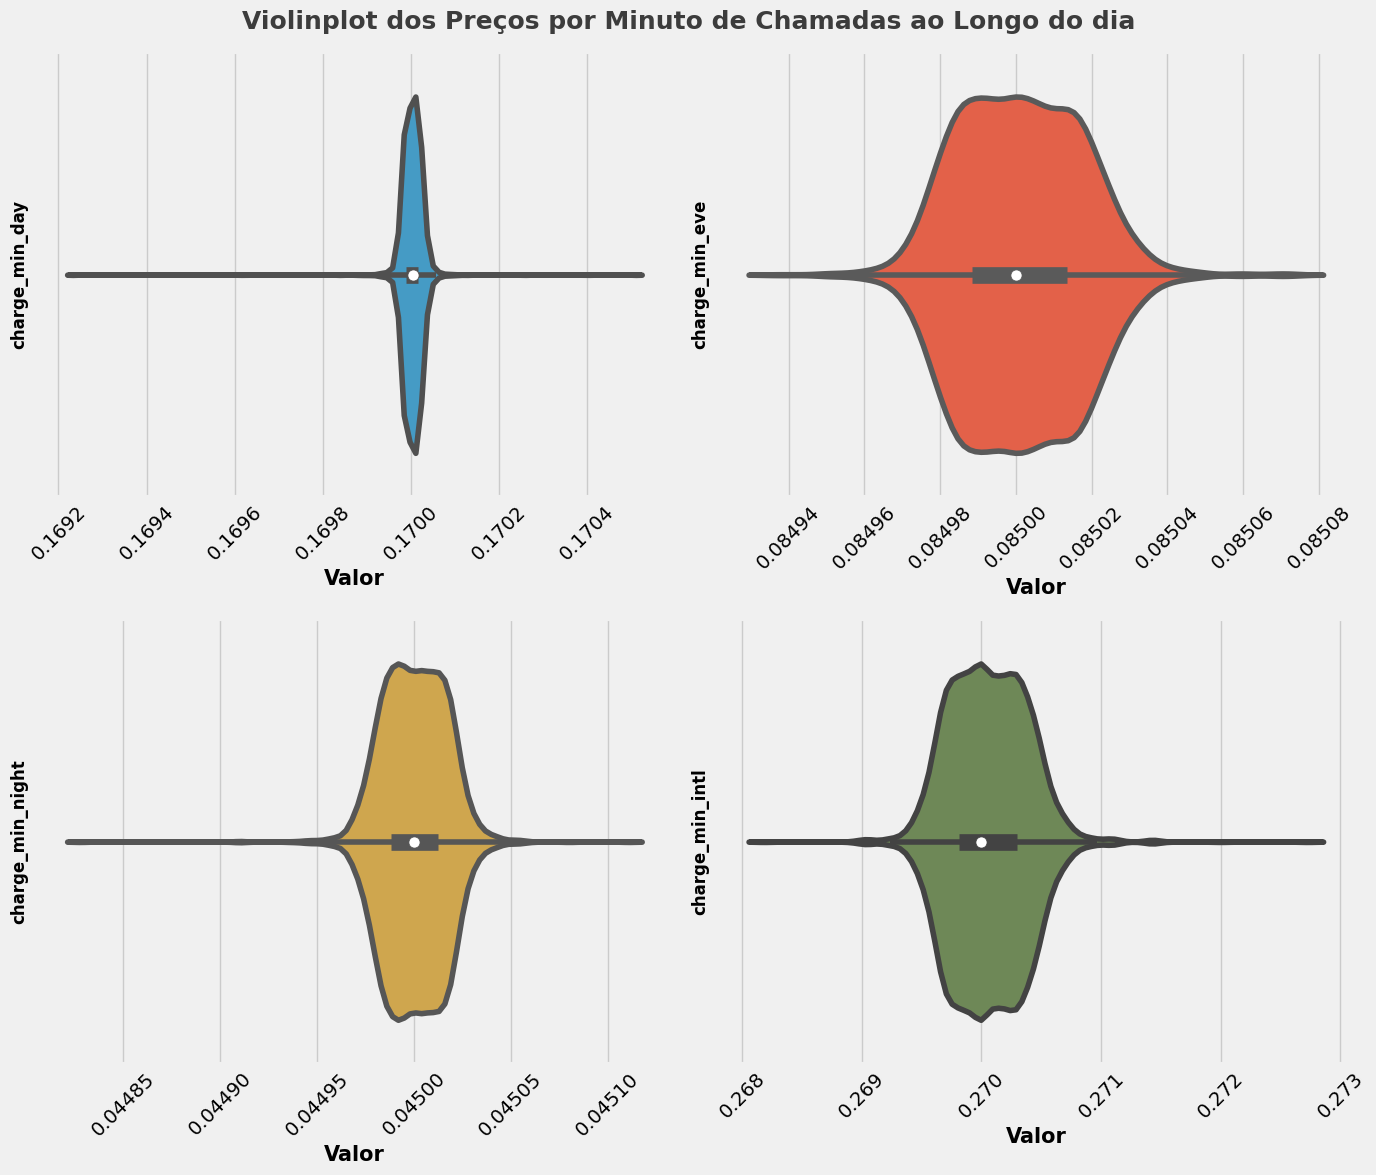

In [44]:
# Definindo a matriz de subplots
fig, axs = plt.subplots(2,2, figsize = (14,12))



# Definindo as cores

five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

# Loop para criar gráfico das variáveis categóricas

for i, ax in enumerate(axs.flat):

    # Criando o violin plot
    sns.violinplot(x = df_price_minutes.iloc[:, i], ax = ax,  color = five_thirty_eight[i])

   
    # Definindo o título dos eixos
    ax.set_xlabel('Valor', size = 15, weight = 'bold')
    ax.set_ylabel(df_price_minutes.columns[i], size = 12, weight = 'bold')

    # Rotacionando os valores apresentados nos rótulos
    ax.tick_params(axis = 'x', labelrotation = 45)
# Título dos gráficos

plt.suptitle('Violinplot dos Preços por Minuto de Chamadas ao Longo do dia',
            size = 18, weight = 'bold',
            alpha = 0.75)
plt.tight_layout()
plt.show()




Interessante! Praticamente todos os valores por minuto de chamadas possuem uma distribuição de seus valores bem concentrada em torno da mediana, com exceção do preço por minuto durante a noite. No entanto, para esta *feature*, percebe-se que a distribuição de seus valores, apesar de se encontrar um pouco mais dispersa, ainda sim é na casa de milésimos e, por isso, aparentemente o seu *violin plot* aparece dessa forma. Vamos confirmar isso:

In [45]:
# Criando um conjunto de dados para analisarmos as estatísticas descritivas das novas variáveis
df_charge = df_price_minutes.describe().\
        T.\
        reset_index(names = 'variables').copy()
df_charge


,variables,count,mean,std,min,25%,50%,75%,max
0,charge_min_day,3331.0,0.170003,0.000028,0.169231,0.169989,0.170004,0.170017,0.170513
1,charge_min_eve,3332.0,0.085001,0.000016,0.084936,0.084988,0.085000,0.085013,0.085075
2,charge_min_night,3333.0,0.045000,0.000017,0.044828,0.044988,0.045000,0.045013,0.045111
3,charge_min_intl,3315.0,0.270057,0.000329,0.268182,0.269811,0.270000,0.270297,0.272727


Verificando apenas a cobrança por minuto de ligacões realizadas no periodo noturno, percebemos que o desvio padrão é somente de **0.000016** e é o menor quando comparado a todos os outros desvios das variáveis. Além disso, é a variável que possui o menor valor em módulo.



In [46]:
# Criando a figura
fig = px.bar(
    df_charge, 
    x= 'variables',
    y = '50%',
    color = 'variables',
    text_auto= True,
    color_discrete_sequence  = five_thirty_eight,
    height = 500,
    width = 800
)

# Alterando os traços da figura
fig.update_traces(
    dict(marker_line_color = 'rgb(0,0,0)',
         marker_line_width = 2)
)

# Adicionando título 
fig.update_layout(title = '<b>Mediana das Novas Variáveis de Preço Por Minuto</b>',
                  title_x = 0.5,
                  title_font = dict(size = 15))

# Alterando os eixos x e y
fig.update_xaxes(title_text = 'Variáveis',
                 title_font = dict(size = 13))
fig.update_yaxes(title_text = 'Valor da Mediana',
                 title_font = dict(size = 13))

Com isso, podemos perceber que as ligações mais caras, em termos de preço/minuto, são ligações internacionais seguidas por ligações realizadas durante o dia.

Em virtude da redução de dimensionalidade do conjunto de dados, vamos testar utilizar um novo conjunto de dados, onde utilizamos nossas novas variáveis criadas anteriormente e iremos excluir as variáveis que demonstraram relação linear perfeita. Vamos criar a classe que será responsável por retirar essas colunas e também por realizar a transformação das nossas colunas

In [47]:

class ChangeColumns(TransformerMixin):
    """Realiza transformações nas colunas do DataFrame."""

    def fit(self, X, y = None):
        return self
        
    def transform(self, X):
        """
        Realiza as transformações nas colunas especificadas do DataFrame.

        Parâmetros:
        X (pd.DataFrame): DataFrame de entrada.

        Retorna:
        pd.DataFrame: DataFrame transformado.
        """
        transformed_X = X.copy()
        transformed_X['charge_min_day'] = transformed_X['total_day_charge'] / transformed_X['total_day_minutes']
        transformed_X['charge_min_eve'] = transformed_X['total_eve_charge'] / transformed_X['total_eve_minutes']
        transformed_X['charge_min_night'] = transformed_X['total_night_charge'] / transformed_X['total_night_minutes']
        transformed_X['charge_min_intl'] = transformed_X['total_intl_charge'] / transformed_X['total_intl_minutes']
        transformed_X = transformed_X.fillna(0) # Substituindo NaN por zero, uma vez que os valores das colunas transformadas podem ser 0
        cols_to_drop = ['total_day_charge', 'total_day_minutes', 'total_eve_minutes', 
                        'total_eve_charge', 'total_intl_minutes', 'total_intl_charge', 
                        'total_night_minutes', 'total_night_charge']
        
        transformed_X = transformed_X.drop(columns=cols_to_drop)
        return transformed_X


## Pré Processando e Aplicando Algoritmos

Temos algumas **features** categoricas que precisam ser pré-processadas para que consigamos utiliza-las em alguns algoritmos.

Como possuímos a variável target **churn** como categórica, vamos aplicar Label Encoding sobre ela.  Além disso, vamos testar algumas técnicas de Categorical Feature Encoding sobre as demais colunas. 

Por fim, percebemos que os dados estão também desbalanceados, dessa forma, vamos testar treinar modelos com ou sem a técnica de data augmentation.

In [48]:
# Dividindo o DataFrame entre as variáveis independentes e dependentes

X = df.drop(columns = ['churn']).copy()
y = df['churn'].copy()

Antes de iniciarmos, vamos criar uma função para que possamos analisar os nossos resultados obtidos dos modelos:

In [49]:
def analyze_model(model): 
    print(f"Melhor modelo: \n Solver: {model.best_params_['model__solver']}\n \
          Regularizaton Strenght: {model.best_params_['model__C']:.3f} \n \
          Penalty: {model.best_params_['model__penalty']} \n \
          Score: {model.best_score_:.4f}")
    
    # Criando um dataframe com os resultados obtidos
    results_model = pd.DataFrame(model.cv_results_).dropna().\
                    sort_values(by = 'rank_test_score')
    

    # Criando visualizações dos resultados obitods
    fig = make_subplots(rows = 5, cols = 3,
                        specs = [[{}, {}, {}],
                                 [{'colspan': 2}, None,  {'colspan': 1}],
                                 [{'colspan': 3}, None, None],
                                 [{'colspan': 3}, None, None],
                                 [{'colspan': 3}, None, None]],

                        subplot_titles = ('Tempo Médio de Ajuste', 'Desvio Padrão do Tempo de Ajuste',
                                          'Tempo Médio de Pontuação',  'Pontuação Média nos Dados de Teste',
                                          'Desvio Padrão da Pontuação em Teste', 'Pontuações em Treino de cada Fold do Melhor Ajuste',
                                          'Pontuações em Teste de cada Fold do Melhor Ajuste'))
   
    # Definindo as cores

    fig.append_trace(go.Histogram(
        x = np.array(results_model['mean_fit_time']),
        histnorm = 'probability',
        marker_color = '#30a2da',
        name = 'tempo médio de ajuste'
    ), row = 1, col = 1)

    fig.append_trace(go.Histogram(
        x = np.array(results_model['std_fit_time']),
        histnorm = 'probability',
        marker_color = '#fc4f30',
        name = 'Desvio médio do tempo de treino'
    ), row = 1, col = 2)

    fig.append_trace(go.Histogram(
        x = np.array(results_model['mean_score_time']),
        histnorm = 'probability',
        marker_color = '#e5ae38',
        name = 'Tempo médio de score'
    ), row = 1, col = 3)


    fig.append_trace(go.Histogram( 
        x = np.array(results_model['mean_test_score']),
        histnorm = 'probability',
        marker_color = '#6d904f',
        name = 'Pontuação Média nos Dados de Teste'
    ), row = 2, col = 1)

    fig.append_trace(go.Histogram(
        x = np.array(results_model['std_test_score']),
        histnorm = 'probability',
        marker_color = '#8b8b8b',
        name = 'Desvio Padrão da Pontuação em Teste'
    ), row = 2, col = 3)

    fig.append_trace(go.Bar(
        y = [results_model[f'split{i}_train_score'].iloc[0] for i in range(5)],
        x = [f'Train_Score_Split_{i}' for i in range(5)],
        name  =  'Pontuação em Folds de Treino',
        marker_color = '#b08819'
    ), row = 3, col = 1)

    fig.append_trace(go.Bar(
        y = [results_model[f'split{i}_test_score'].iloc[0] for i in range(5)],
        x = [f'Test_Score_Split_{i}' for i in range(5)],
        name  =  'Pontuação em Folds de Teste',
        marker_color = '#6e0dbd'
    ), row = 4, col = 1)


    fig.update_traces(
        dict(marker_line_color = 'rgb(0,0,0)',
             marker_line_width = 2)
    )
    fig.update_layout(height=800, width=800,
                       title ="Estatísticas dos Modelos Treinados (em segundos)",
                       title_x = 0.5,
                       title_font = dict(size = 20),
                       showlegend = False
    )

    fig.update_annotations(font_size = 12.5,
                           font_color = 'black',
                           opacity = 1)

    fig.update_yaxes(title_text = 'Probabilidade (%)', row = 1, col = 1,
                     title_font = dict(size = 11,
                                        color = 'black'))
    fig.update_yaxes(title_text = 'Probabilidade(%)', row = 2, col = 1,
                     title_font = dict(size = 11,
                                        color = 'black'))
    
    fig.update_yaxes(title_text = 'ROC-AUC Value',
                     row = 3, col = 1,
                     title_font = dict(size = 11,
                                       color = 'black'))
    
    fig.update_yaxes(title_text = 'ROC-AUC Value',
                     row = 4, col = 1,
                     title_font = dict(size = 11,
                                       color = 'black'))

    fig.update_xaxes(title_text = 'Tempo (s)',
                      title_font = dict(size = 11,
                                        color = 'black'))
    
    fig.update_xaxes(title_text = 'Num. Fold', 
                     title_font = dict(size = 11,
                                       color = 'black'), row = 3, col = 1)
    
    fig.update_xaxes(title_text = 'Num. Fold', 
                     title_font = dict(size = 11,
                                       color = 'black'), row = 4, col = 1)


      
    return fig 

In [50]:
recall = make_scorer(recall_score, pos_label = 'yes', average = 'binary')

In [51]:
def train_models_lgr(X, y, model , 
                  cat_enc_method, feat_eng = 'Yes'):
    
    X_train = X.copy()
    y_train = y.copy()

    if feat_eng == 'Yes':
        steps = [
        ('Change_Columns', ChangeColumns()),
        ('Categorical_Encoder', cat_enc_method),
        ('scaler', StandardScaler()),
        ('model', model)
    ]
    else:
        steps = [
        ('Categorical_Encoder', cat_enc_method),
        ('scaler', StandardScaler()),
        ('model', model)
        ]

    # Criando o grid de features que serão testadas
   
    grid_features = [{
        'model__penalty': ['l2', None],
        'model__C'  : np.linspace(0, 1, 40),
        'model__solver' : ['lbfgs', 'newton-cg', 'sag']
    },
        {
        'model__penalty': ['l1', 'l2'],
        'model__C'  : np.linspace(0, 1, 40),
        'model__solver' :  ['liblinear']
        },
        {
        'model__penalty': ['l1', 'l2', None, 'elasticnet'],
        'model__C'  : np.linspace(0, 1, 40),
        'model__solver' :  ['saga']
        }

    ]
    pipe_model = Pipeline(steps = steps)
    
    pipe_v0 = GridSearchCV(pipe_model,
                           param_grid = grid_features,
                           scoring = recall,
                           cv = 5,
                           return_train_score = True)
    pipe_v0.fit(X_train, y_train)
    
    y_predic_train = pipe_v0.predict(X)

    confus_matrix = confusion_matrix(y, y_predic_train)

    sns.heatmap(confus_matrix, annot=True, fmt='.2f', cmap='Blues')

    plt.title('Matriz de Confusão')
    plt.xlabel('Valor Predito')
    plt.ylabel('Valor Real')

    return pipe_v0
    
    


In [74]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def teste(X, y, model ,
                  cat_enc_method, feat_eng = 'Yes'):
    
    X_train = X.copy()
    y_train = y.copy()

    if feat_eng == 'Yes':
        steps = [
        ('o', SMOTE(sampling_strategy = 0.4)),
        ('u', RandomUnderSampler(sampling_strategy = 0.7)),
        ('Change_Columns', ChangeColumns()),
        ('Categorical_Encoder', cat_enc_method),
        ('scaler', StandardScaler()),
        ('model', model)
    ]
    else:
        steps = [
        ('o', SMOTE(sampling_strategy = 0.4)),
        ('u', RandomUnderSampler(sampling_strategy = 0.7)),
        ('Categorical_Encoder', cat_enc_method),
        ('scaler', StandardScaler()),
        ('model', model)
        ]

    # Criando o grid de features que serão testadas
   
    grid_features = [{
        'model__penalty': ['l2', None],
        'model__C'  : np.linspace(0, 1, 40),
        'model__solver' : ['lbfgs', 'newton-cg', 'sag'],
        'o__k_neighbors' : np.arange(4, 9, 1)
    },
        {
        'model__penalty': ['l1', 'l2'],
        'model__C'  : np.linspace(0, 1, 40),
        'model__solver' :  ['liblinear'],
        'o__k_neighbors' : np.arange(4, 9, 1)
        },
        {
        'model__penalty': ['l1', 'l2', None, 'elasticnet'],
        'model__C'  : np.linspace(0, 1, 40),
        'model__solver' :  ['saga'],
        'o__k_neighbors' : np.arange(4, 9, 1)
        }

    ]
    pipe_model = Pipeline(steps = steps)
    
    pipe_v0 = GridSearchCV(pipe_model,
                           param_grid = grid_features,
                           scoring = recall,
                           cv = 5,
                           return_train_score = True)
    pipe_v0.fit(X_train, y_train)
    
    y_predic_train = pipe_v0.predict(X)

    confus_matrix = confusion_matrix(y, y_predic_train)

    sns.heatmap(confus_matrix, annot=True, fmt='.2f', cmap='Blues')

    plt.title('Matriz de Confusão')
    plt.xlabel('Valor Predito')
    plt.ylabel('Valor Real')

    return pipe_v0
    
    


### Baseline

### Backward Encoding

In [77]:
mod_teste = teste(X, y, LogisticRegression( random_state = 40,
                                                     class_weight = 'balanced'),
             ce.backward_difference.BackwardDifferenceEncoder(cols = ['state', 'area_code',
                         'international_plan', 'voice_mail_plan']), 'Yes')
mod_teste

ValueError: 
All the 12000 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Gabriel\anaconda3\envs\projeto03_DSA\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Gabriel\anaconda3\envs\projeto03_DSA\Lib\site-packages\imblearn\pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Gabriel\anaconda3\envs\projeto03_DSA\Lib\site-packages\imblearn\pipeline.py", line 240, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Gabriel\anaconda3\envs\projeto03_DSA\Lib\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Gabriel\anaconda3\envs\projeto03_DSA\Lib\site-packages\sklearn\pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Gabriel\anaconda3\envs\projeto03_DSA\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Gabriel\anaconda3\envs\projeto03_DSA\Lib\site-packages\sklearn\base.py", line 881, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Gabriel\anaconda3\envs\projeto03_DSA\Lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Gabriel\AppData\Local\Temp\ipykernel_2140\2313023466.py", line 18, in transform
    transformed_X['charge_min_day'] = transformed_X['total_day_charge'] / transformed_X['total_day_minutes']
                                      ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Change_Columns',
                                        <__main__.ChangeColumns object at 0x000001F4809F68D0>),
                                       ('Categorical_Encoder',
                                        BackwardDifferenceEncoder(cols=['state',
                                                                        'area_code',
                                                                        'international_plan',
                                                                        'voice_mail_plan'])),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=40))]),
             param_grid=[{'model...
       0.51282051, 0.53846154, 0.56410256, 0.58974359, 0.61538462,
       0.64102564, 0.66666667, 0.69230769, 0.71794872, 0.74358974,
       0.76923077, 0.79487179, 0.82051282, 0.84615385, 0.87179487,
       0.8974359 , 0.92307692, 0.94871795, 0.97435897, 1.        ]),
                          'model__penalty': ['l1', 'l2', None, 'elasticnet'],
                          'model__solver': ['saga']}],
             return_train_score=True,
             scoring=make_scorer(recall_score, pos_label=yes, average=binary))

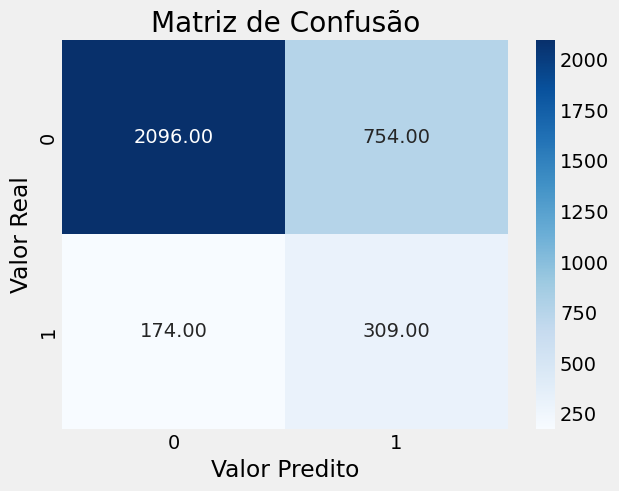

In [52]:
model_v0 = train_models_lgr(X, y, LogisticRegression( random_state = 40,
                                                     class_weight = 'balanced'),
             ce.backward_difference.BackwardDifferenceEncoder(cols = ['state', 'area_code',
                         'international_plan', 'voice_mail_plan']), 'Yes')
model_v0

In [53]:
analyze_model(model_v0)

Melhor modelo: 
 Solver: liblinear
           Regularizaton Strenght: 0.077 
           Penalty: l1 
           Score: 0.6357


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Categorical_Encoder',
                                        BackwardDifferenceEncoder(cols=['state',
                                                                        'area_code',
                                                                        'international_plan',
                                                                        'voice_mail_plan'])),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=40))]),
             param_grid=[{'model__C': array([0.        , 0.02564103, 0.05128205, 0.07692308, 0.1025641 ,
       0.12820513, 0...
       0.51282051, 0.53846154, 0.56410256, 0.58974359, 0.61538462,
       0.64102564, 0.66666667, 0.69230769, 0.71794872, 0.74358974,
       0.76923077, 0.79487179, 0.82051282, 0.84615385, 0.87179487,
       0.8974359 , 0.92307692, 0.94871795, 0.97435897, 1.        ]),
                          'model__penalty': ['l1', 'l2', None, 'elasticnet'],
                          'model__solver': ['saga']}],
             return_train_score=True,
             scoring=make_scorer(recall_score, pos_label=yes, average=binary))

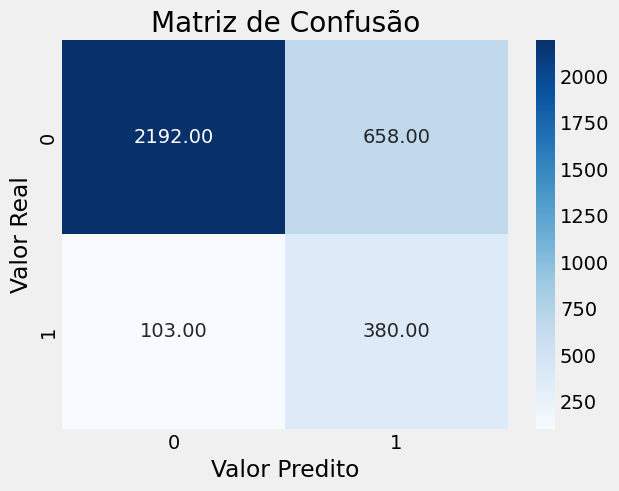

In [54]:
model_v0_woft = train_models_lgr(X, y, LogisticRegression( random_state = 40,
                                                     class_weight = 'balanced'),
             ce.backward_difference.BackwardDifferenceEncoder(cols = ['state', 'area_code',
                         'international_plan', 'voice_mail_plan']), 'No')
model_v0_woft

Com a função criada para analisar o nosso modelo e sua criação, podemos retirar alguns insights interessantes: 
* Durante a etapa de validação cruzada, foi possível avaliar que 88% da  pontuação média obtida estava  entre 0.73 e 0.77 
* Por outro lado, percebemos que foram encontradas apenas pequenos desvios padrões entre as pontuações de teste, estando a maior faixa de ocorrencias (37%) entre 0.0125 e 0.017 .

### Binary Encoding

Devido a nossa análise exploratória realizada previamente, sabemos que existem **53** estados diferentes presentes no conjunto de dados. Alguns métodos de **Categorical Encoding** geram diversas colunas numéricas. Isso pode afetar negativamente o tempo em que um Pipeline em geral demora para ser executado e nem sempre significa que irá impactar positivamente a métrica de avaliação do modelo criado. 

Portanto, apesar dos **draw backs** existentes no Binary Encoding como, por exemplo, a  p

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Change_Columns',
                                        <__main__.ChangeColumns object at 0x000001F4FD391B10>),
                                       ('Categorical_Encoder',
                                        BinaryEncoder(cols=['state',
                                                            'area_code',
                                                            'international_plan',
                                                            'voice_mail_plan'])),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(random_state=40))]),
             param_grid=[{'model__C': array([0.        , 0.02564103, 0.05128205...
       0.51282051, 0.53846154, 0.56410256, 0.58974359, 0.61538462,
       0.64102564, 0.66666667, 0.69230769, 0.71794872, 0.74358974,
       0.76923077, 0.79487179, 0.82051282, 0.84615385, 0.87179487,
       0.8974359 , 0.92307692, 0.94871795, 0.97435897, 1.        ]),
                          'model__penalty': ['l1', 'l2', None, 'elasticnet'],
                          'model__solver': ['saga']}],
             return_train_score=True,
             scoring=make_scorer(recall_score, pos_label=yes, average=binary))

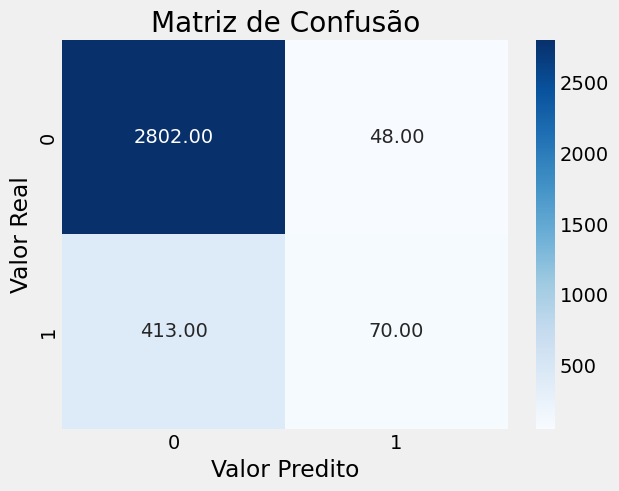

In [55]:
model_v1 = train_models_lgr(X, y, LogisticRegression(random_state = 40),
             ce.BinaryEncoder(cols = ['state', 'area_code',
                         'international_plan', 'voice_mail_plan']), 'Yes')

model_v1

In [56]:
analyze_model(model_v1)

Melhor modelo: 
 Solver: liblinear
           Regularizaton Strenght: 0.436 
           Penalty: l1 
           Score: 0.1284


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Categorical_Encoder',
                                        BinaryEncoder(cols=['state',
                                                            'area_code',
                                                            'international_plan',
                                                            'voice_mail_plan'])),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(random_state=40))]),
             param_grid=[{'model__C': array([0.        , 0.02564103, 0.05128205, 0.07692308, 0.1025641 ,
       0.12820513, 0.15384615, 0.17948718, 0.20512821, 0.23...
       0.51282051, 0.53846154, 0.56410256, 0.58974359, 0.61538462,
       0.64102564, 0.66666667, 0.69230769, 0.71794872, 0.74358974,
       0.76923077, 0.79487179, 0.82051282, 0.84615385, 0.87179487,
       0.8974359 , 0.92307692, 0.94871795, 0.97435897, 1.        ]),
                          'model__penalty': ['l1', 'l2', None, 'elasticnet'],
                          'model__solver': ['saga']}],
             return_train_score=True,
             scoring=make_scorer(recall_score, pos_label=yes, average=binary))

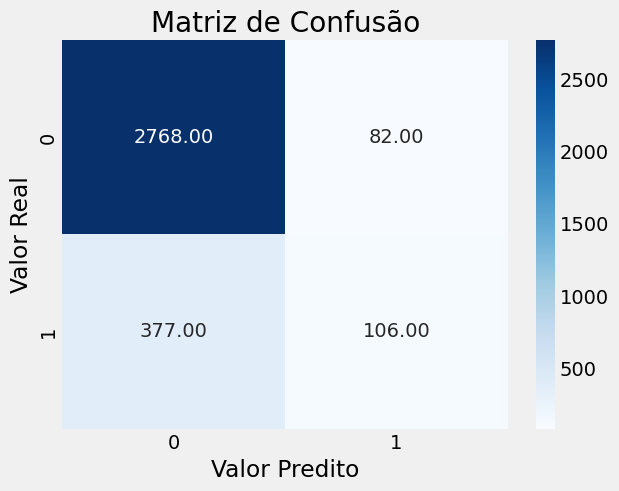

In [57]:
model_v1_woft = train_models_lgr(X, y, LogisticRegression(random_state = 40),
             ce.BinaryEncoder(cols = ['state', 'area_code',
                         'international_plan', 'voice_mail_plan']), 'No')

model_v1_woft

In [58]:
analyze_model(model_v1_woft)

Melhor modelo: 
 Solver: newton-cg
           Regularizaton Strenght: 0.026 
           Penalty: None 
           Score: 0.2111


### One Hot Encoding

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Change_Columns',
                                        <__main__.ChangeColumns object at 0x000001F4FFB7BF50>),
                                       ('Categorical_Encoder',
                                        OneHotEncoder(cols=['state',
                                                            'area_code',
                                                            'international_plan',
                                                            'voice_mail_plan'])),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(random_state=40))]),
             param_grid=[{'model__C': array([0.        , 0.02564103, 0.05128205...
       0.51282051, 0.53846154, 0.56410256, 0.58974359, 0.61538462,
       0.64102564, 0.66666667, 0.69230769, 0.71794872, 0.74358974,
       0.76923077, 0.79487179, 0.82051282, 0.84615385, 0.87179487,
       0.8974359 , 0.92307692, 0.94871795, 0.97435897, 1.        ]),
                          'model__penalty': ['l1', 'l2', None, 'elasticnet'],
                          'model__solver': ['saga']}],
             return_train_score=True,
             scoring=make_scorer(recall_score, pos_label=yes, average=binary))

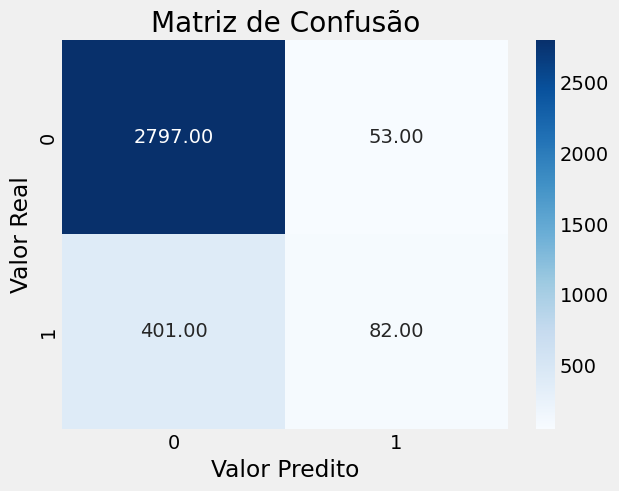

In [59]:
model_v2 = train_models_lgr(X, y, LogisticRegression(random_state = 40),
                          ce.OneHotEncoder(cols = ['state', 'area_code',
                         'international_plan', 'voice_mail_plan']), 'Yes')

model_v2

In [60]:
analyze_model(model_v2)

Melhor modelo: 
 Solver: liblinear
           Regularizaton Strenght: 0.769 
           Penalty: l1 
           Score: 0.1594


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Change_Columns',
                                        <__main__.ChangeColumns object at 0x000001F4FFB78710>),
                                       ('Categorical_Encoder',
                                        OneHotEncoder(cols=['state',
                                                            'area_code',
                                                            'international_plan',
                                                            'voice_mail_plan'])),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(random_state=40))]),
             param_grid=[{'model__C': array([0.        , 0.02564103, 0.05128205...
       0.51282051, 0.53846154, 0.56410256, 0.58974359, 0.61538462,
       0.64102564, 0.66666667, 0.69230769, 0.71794872, 0.74358974,
       0.76923077, 0.79487179, 0.82051282, 0.84615385, 0.87179487,
       0.8974359 , 0.92307692, 0.94871795, 0.97435897, 1.        ]),
                          'model__penalty': ['l1', 'l2', None, 'elasticnet'],
                          'model__solver': ['saga']}],
             return_train_score=True,
             scoring=make_scorer(recall_score, pos_label=yes, average=binary))

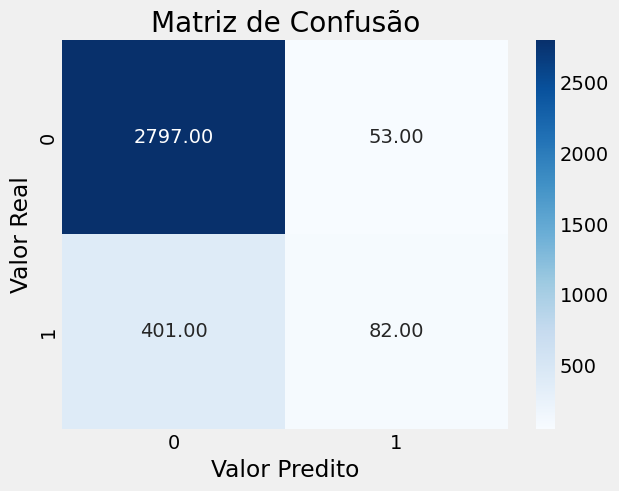

In [61]:
model_v2_woft = train_models_lgr(X, y, LogisticRegression(random_state = 40),
                          ce.OneHotEncoder(cols = ['state', 'area_code',
                         'international_plan', 'voice_mail_plan']), 'Yes')

model_v2_woft

In [62]:
analyze_model(model_v2_woft)

Melhor modelo: 
 Solver: liblinear
           Regularizaton Strenght: 0.769 
           Penalty: l1 
           Score: 0.1594


### Binary Encoding + One Hot Encoding

In [63]:
def train_models_lgr_v2(X, y, model, feat_eng = None):


    X_train = X.copy()
    y_train = y.copy()

    if feat_eng == 'Yes':
        steps = [
        ('Change_Columns', ChangeColumns()),
        ('One_Hot_Encoder', ce.OneHotEncoder(cols = [ 'area_code',
                            'international_plan', 'voice_mail_plan'])),
        ('Binary_Encoder', ce.BinaryEncoder(cols = ['state'])),
        ('scaler', StandardScaler()),
        ('model', model)
    ]
    else:
         steps = [
        ('One_Hot_Encoder', ce.OneHotEncoder(cols = [ 'area_code',
                            'international_plan', 'voice_mail_plan'])),
        ('Binary_Encoder', ce.BinaryEncoder(cols = ['state'])),
        ('scaler', StandardScaler()),
        ('model', model)
]


    # Criando o grid de features que serão testadas
   
    grid_features = [{
        'model__penalty': ['l2', None],
        'model__C'  : np.linspace(0, 1, 40),
        'model__solver' : ['lbfgs', 'newton-cg', 'sag']
    },
        {
        'model__penalty': ['l1', 'l2'],
        'model__C'  : np.linspace(0, 1, 40),
        'model__solver' :  ['liblinear']
        },
        {
        'model__penalty': ['l1', 'l2', None, 'elasticnet'],
        'model__C'  : np.linspace(0, 1, 40),
        'model__solver' :  ['saga']
        }

    ]
    
   

    pipe_model = Pipeline(steps = steps)
    
    pipe_v2 = GridSearchCV(pipe_model,
                           param_grid = grid_features,
                           scoring = recall,
                           cv = 5,
                           return_train_score = True)
    
    pipe_v2.fit(X_train, y_train)
    
    y_predic_train = pipe_v2.predict(X)

    confus_matrix = confusion_matrix(y, y_predic_train)

    sns.heatmap(confus_matrix, annot=True, fmt='.2f', cmap='Blues')

    plt.title('Matriz de Confusão')
    plt.xlabel('Valor Predito')
    plt.ylabel('Valor Real')

    return pipe_v2
    
    


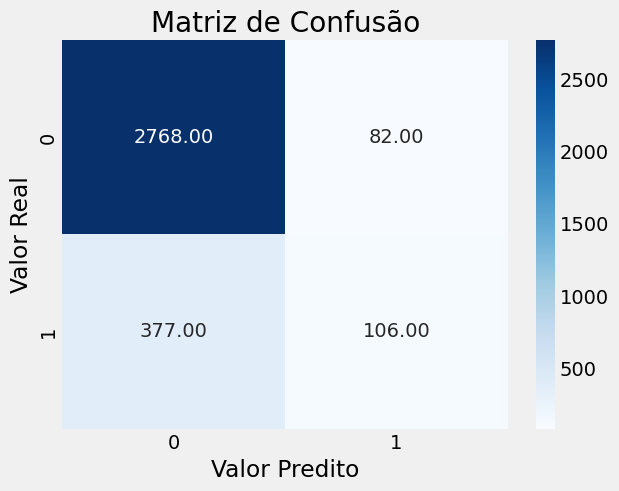

In [64]:
model_v3 = train_models_lgr_v2(X, y,
                               LogisticRegression(random_state = 40))

In [65]:
analyze_model(model_v3)

Melhor modelo: 
 Solver: newton-cg
           Regularizaton Strenght: 0.026 
           Penalty: None 
           Score: 0.2111


Testando as 5 técnicas de Categorical Encoding, percebemos que a técnica que obteve o melhor resultado foi a Backward Encoding. Dito isso, vamos tentar adicionar uma técnica de **Feature Selection** e ver se conseguimos extrair melhores resultados. 

Para este problema, iremos utilizar **Feature Recursive Elimination (RFE)**, um método que, através de um **estimator**, busca cada vez mais treinar um determinado modelo com menores conjuntos de dados de maneira que a cada iteração, as features com menores importancias são excluídas do conjunto de dados que alimentará o modelo.

### Binary Encoding + RFE

In [66]:
def train_models_lgr_v3(X, y, model , 
                  cat_enc_method):
    
    X_train = X.copy()
    y_train = y.copy()

    steps = [
    ('Categorical_Encoder', cat_enc_method),
    ('Feature_Selection', RFE(LogisticRegression( random_state = 40))),
    ('scaler', StandardScaler()),
    ('model', model)
]

    # Criando o grid de features que serão testadas
   
    grid_features = [{
        'model__penalty': ['l2', None],
        'model__C'  : np.linspace(0, 1, 40),
        'model__solver' : ['lbfgs', 'newton-cg', 'sag']
    },
        {
        'model__penalty': ['l1', 'l2'],
        'model__C'  : np.linspace(0, 1, 40),
        'model__solver' :  ['liblinear']
        },
        {
        'model__penalty': ['l1', 'l2', None, 'elasticnet'],
        'model__C'  : np.linspace(0, 1, 40),
        'model__solver' :  ['saga']
        }

    ]
    
   

    pipe_model = Pipeline(steps = steps)
    
    pipe_v3 = GridSearchCV(pipe_model,
                           param_grid = grid_features,
                           scoring = recall,
                           cv = 5,
                           return_train_score = True)


    pipe_v3.fit(X_train, y_train)
    
    y_predic_train = pipe_v3.predict(X)

    confus_matrix = confusion_matrix(y, y_predic_train)

    sns.heatmap(confus_matrix, annot=True, fmt='.2f', cmap='Blues')

    plt.title('Matriz de Confusão')
    plt.xlabel('Valor Predito')
    plt.ylabel('Valor Real')

    return pipe_v3

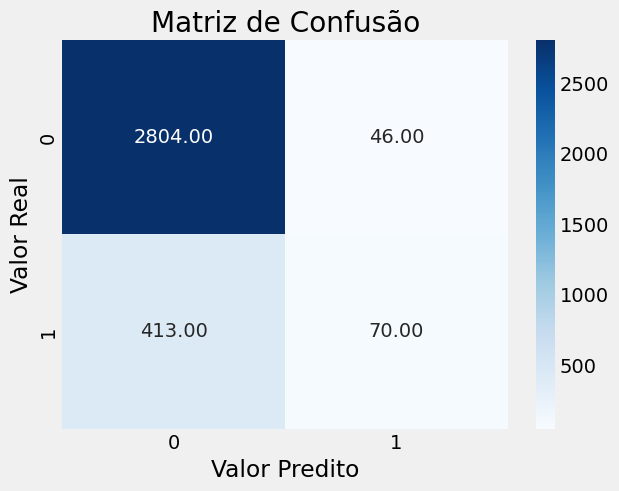

In [67]:
model_v4 = train_models_lgr_v3(X, y, LogisticRegression(random_state = 40),
                          ce.backward_difference.BackwardDifferenceEncoder(cols = ['state', 'area_code',
                         'international_plan', 'voice_mail_plan']))

In [68]:
analyze_model(model_v4)

Melhor modelo: 
 Solver: liblinear
           Regularizaton Strenght: 0.769 
           Penalty: l1 
           Score: 0.1449


## Prevendo nossos clientes

Com o nosso modelo criado, vamos verificar como ele irá se comportar em dados nunca antes vistos. Para isso, vamos carregar um novo conjunto de dados e avalia-lo

In [69]:
df_unseen = pd.read_csv('projeto4_telecom_teste.csv', index_col = 0)
X_teste = df_unseen.drop(columns='churn').copy()
Y_teste = df_unseen['churn'].copy()

Text(21.78333333333333, 0.5, 'Valor Real')

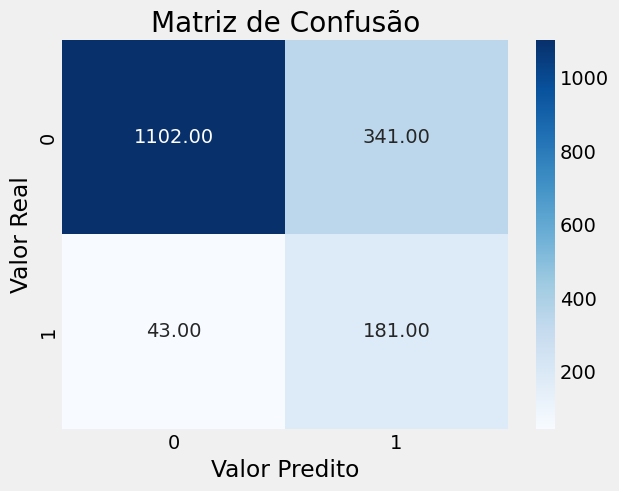

In [70]:
y_predito = model_v0_woft.predict(X_teste)


confus_matrix = confusion_matrix(Y_teste, y_predito)

sns.heatmap(confus_matrix, annot=True, fmt='.2f', cmap='Blues')

plt.title('Matriz de Confusão')
plt.xlabel('Valor Predito')
plt.ylabel('Valor Real')